In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
#Function to get the standard deviation for each column in a Dataframe
def standardize_df(df):
    mean_of_column = df.mean()
    std_of_column = df.std()
    return (df - mean_of_column)/std_of_column

In [60]:
#Two Proportion Z-Test which follows the equation as shown below. 
def ztest(series1, series2, n1, n2, popmean):
    n1 = float(len(n1))
    n2 = float(len(n2))
    series1 = float(len(series1))
    series2 = float(len(series2))
    p1 = series1/n1
    p2 = series2/n2
    z = (p1 - p2)/math.sqrt(popmean * (1-popmean) * ((1/n1)+(1/n2)))
    return z

\begin{equation}
Z=\dfrac{(\hat{p}_1-\hat{p}_2)-0}{\sqrt{\hat{p}(1-\hat{p})\left(\dfrac{1}{n_1}+\dfrac{1}{n_2}\right)}}
\end{equation}

In this project, I will be mainly exploring factors and characteristics that are more likely to be present in the passengers who survived the events of Titantic versus those that did not. 

In [39]:
titanic_data_path = 'data\\titanic-data.csv'
titanic_data = pd.read_csv(titanic_data_path)

In [40]:
#Dropping data related to the name of the passenger, ticket and cabin as I will not be using them as part of my analysis.
#I will also be dropping all passengers with NaN values in order to ensure that I do not run into problems later in my analysis.
titanic_data_df = pd.DataFrame(titanic_data)
titanic_data_df = titanic_data_df.drop(['Name', 'Ticket', 'Cabin'], axis=1).dropna()

In [41]:
#Looking at what the data looks like before beginning analysis
#Note, the code below was ran first before I decided to use the dropna function
print(titanic_data_df.head())

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0            1         0       3    male  22.0      1      0   7.2500        S
1            2         1       1  female  38.0      1      0  71.2833        C
2            3         1       3  female  26.0      0      0   7.9250        S
3            4         1       1  female  35.0      1      0  53.1000        S
4            5         0       3    male  35.0      0      0   8.0500        S


In [42]:
print(titanic_data_df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   712.000000  712.000000  712.000000  712.000000  712.000000   
mean    448.589888    0.404494    2.240169   29.642093    0.514045   
std     258.683191    0.491139    0.836854   14.492933    0.930692   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     222.750000    0.000000    1.000000   20.000000    0.000000   
50%     445.000000    0.000000    2.000000   28.000000    0.000000   
75%     677.250000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    5.000000   

            Parch        Fare  
count  712.000000  712.000000  
mean     0.432584   34.567251  
std      0.854181   52.938648  
min      0.000000    0.000000  
25%      0.000000    8.050000  
50%      0.000000   15.645850  
75%      1.000000   33.000000  
max      6.000000  512.329200  


Here, we can see that roughly 40% of passengers survived the events of Titanic (After we dropped all of the passengers with NaN values). Here, we can see that the average age of passengers onboard the Titanic is around 29-30. In addition, many passengers came with their siblings or with their family. In terms of fare paid, we see that the average person paid around 34, which is pretty far away from the maximum of 512. Furthermore, the standard deviation of the fare paid seems quite high as well.

In [43]:
survival_group_data = titanic_data_df.groupby('Survived')
print(survival_group_data.mean())

          PassengerId    Pclass        Age     SibSp     Parch       Fare
Survived                                                                 
0          442.299528  2.485849  30.626179  0.525943  0.365566  22.965456
1          457.850694  1.878472  28.193299  0.496528  0.531250  51.647672


Here, I grouped passenger data by based on whether they survived and printed the mean to see if there are any obvious differences between the two groups. At first glance, it seems that some of the noticeable differences between the passengers that survived and those did not not are their socio-economic class (Pclass) and the Fare paid. We can also see that that survived the events of Titanic are on average, slightly younger. However, I would have thought that the average age of those that survived will be much younger, especially since I would think that children onboard the Titanic will be prioritised. 

In [44]:
#Separated data to include only those that survived
survived_group = titanic_data_df[titanic_data_df['Survived'] == 1]
survived_group_age = survived_group['Age']

In [45]:
#Separated data to include only those that did not survive
did_not_survive_group = titanic_data_df[titanic_data_df['Survived'] == 0]
did_not_survive_group_age = did_not_survive_group['Age']

In [46]:
survival_group_data['Age'].describe()

Survived       
0         count    424.000000
          mean      30.626179
          std       14.172110
          min        1.000000
          25%       21.000000
          50%       28.000000
          75%       39.000000
          max       74.000000
1         count    288.000000
          mean      28.193299
          std       14.859146
          min        0.420000
          25%       19.000000
          50%       28.000000
          75%       36.000000
          max       80.000000
Name: Age, dtype: float64

The describe data here is suprising to me at first. As with earlier, I would have thought that the average age of those that survived is much younger, and therefore would yield a standard deviation that is much larger. However, there does not seem to much difference at first glance between the group that survived and the group that did not. However, I believe further investigation will be required to find out why this is the case.

Populating the interactive namespace from numpy and matplotlib


(array([  64.,  115.,  230.,  154.,   86.,   42.,   16.,    5.]),
 array([  0.42  ,  10.3675,  20.315 ,  30.2625,  40.21  ,  50.1575,
         60.105 ,  70.0525,  80.    ]),
 <a list of 8 Patch objects>)

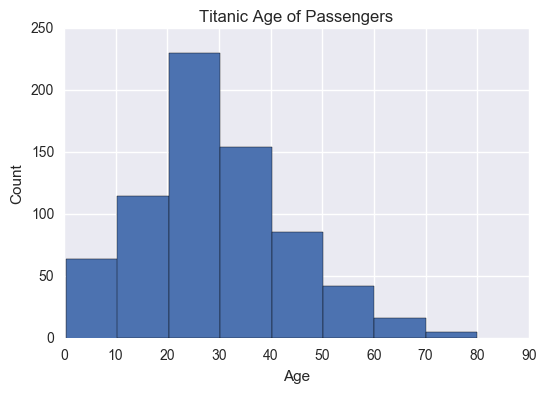

In [47]:
#Here, I have plotted the overall age of all passengers that were on the Titanic (Minus those with NaN data).
# I have chosen to use Bins = 8 to align each bin nicely with the x axis. 
%pylab inline
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Titanic Age of Passengers")
plt.hist(titanic_data_df['Age'], bins=8)

(array([ 38.,  44.,  84.,  68.,  33.,  17.,   3.,   1.]),
 array([  0.42  ,  10.3675,  20.315 ,  30.2625,  40.21  ,  50.1575,
         60.105 ,  70.0525,  80.    ]),
 <a list of 8 Patch objects>)

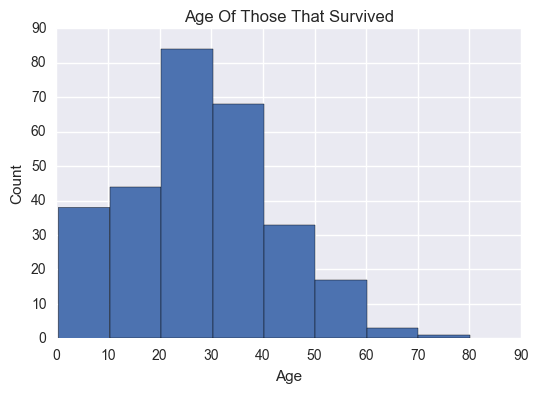

In [48]:
#Plotting histogram for the ages of the passengers that survived
plt.xlabel("Age")
plt.ylabel('Count')
plt.title("Age Of Those That Survived")
plt.hist(survived_group_age,bins=8)

(array([  26.,   59.,  129.,   93.,   57.,   33.,   17.,   10.]),
 array([  1.   ,  10.125,  19.25 ,  28.375,  37.5  ,  46.625,  55.75 ,
         64.875,  74.   ]),
 <a list of 8 Patch objects>)

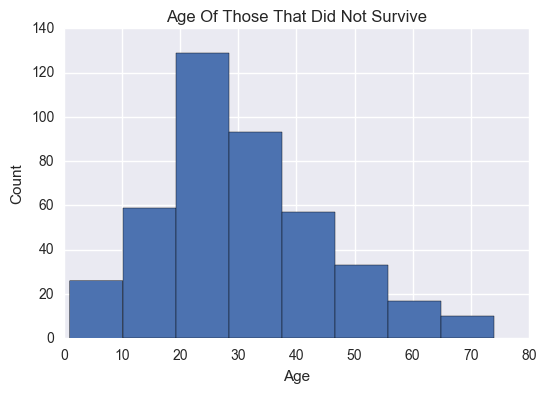

In [49]:
#Plotting the ages of the passengers that did not survive
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Of Those That Did Not Survive")
plt.hist(did_not_survive_group_age,bins=8)

The hisogram shows that the age of passengers onboard the Titanic is postively skewed. It also shows that most of the passengers are around the age 20 to 30 (Mode). In my opinion, this makes sense as the Titanic journey was a long one especially since the trip started as far as from Southampton and going all the way to New York$^1$. As people in their 20s and 30s are generally in their most active and adventurous stage of life (debatable), I believe they are more likely than those that are older or are very young to be in this trip. However, if we look at the graph of those that survived vs the graph of those that did not, we can see that many passengers that are younger than 18 survived the journey. In fact, it seems that this is the only age group that has a discernable difference between the two histograms (survived vs did not survive). At the same time, the other age group survival rate seemed to remained roughly the same. Furthermore, they make up a greater proportion (61/290 = 0.21) of the group that survived vs the group that did not(52/424 = 0.12) with a group overall survival rate of 61/(61+52) = 0.54. Most likely, this is because they were given the highest priority when evacuating the ship, especially since many of the minors are probably accompanying their parents. 


In [108]:
#Here, I am putting all passengers into Age Groups to gain insights on their survival rates.
#Though I have included several age groups here, I will be ultimately focused on only those that were 18 and younger(Minors)
#And those that are 18 and older (Adults). I will be seperating data on those that survived and those that did not.
bins = [0, 18, 30, 40, 50, 60, 70, 100]
group_name = ["0 to 17", "18 to 29", "30 to 39", "40 to 49", "50 to 59", "60 to 69", "70 and above"]
survived_group['Age Group'] = pd.cut(survived_group['Age'], bins, labels = group_name, right=False, include_lowest=True)
did_not_survive_group['Age Group'] = pd.cut(did_not_survive_group['Age'], bins, labels = group_name, right=False, include_lowest=True)

In [51]:
#Count the number of passengers in each age group and in the group that survived and those that did not
survived_grouped_by_age = survived_group.groupby('Age Group')['Survived'].count()
did_not_survive_group_by_age = did_not_survive_group.groupby('Age Group')['Survived'].count()

In [106]:
#Here I calculated the overall survival rate for each age group in proportions and rounded the numbers by 2 decimal places.
#I then multiplied by 100 to get the percentage rather than the proportion
overall_age_group_survival =  survived_grouped_by_age/(survived_grouped_by_age + did_not_survive_group_by_age)
overall_age_group_survival = overall_age_group_survival.round(decimals = 2) 
print(overall_age_group_survival * 100)

Age Group
0 to 17         54.0
18 to 29        35.0
30 to 39        43.0
40 to 49        38.0
50 to 59        42.0
60 to 69        28.0
70 and above    14.0
Name: Survived, dtype: float64


In [53]:
#Here I calculated the standard deviation for each age group 
print(standardize_df(overall_age_group_survival))

Age Group
0 to 17         1.399396
18 to 29       -0.101569
30 to 39        0.530416
40 to 49        0.135425
50 to 59        0.451418
60 to 69       -0.654556
70 and above   -1.760531
Name: Survived, dtype: float64


We can see here that being in the age group '0 to 17' tended to give you the highest chance to survive the events of Titanic at that time. Suprisingly besides the 0 to 17 group, being younger does not seem to be advantageous for one's survival at the time. Still, being at the other extreme end of being too old such as the age group 70 and above offers the lowest chance of survival. However, the data here this may not be accurate as the sample size is quite low. In addition, it might be useful to conduct a two porportion z-test to see whether the survival rate of being younger truly differed from those that are older at the time. It might be useful in this case, to seperate the age groups to only two groups, those younger than 18 (Minors) and those 18 and above (Adults). 

In [107]:
#Here I took passenger data on only whether they survived, in addition to their Sex and Age
#Also,I grouped all passengers to either belonging to those younger than 18 (Minors) or those that are 18 and older (Adults)
#I have decided to create a new Dataframe without modifying the original 

passenger_survival_data = titanic_data_df[['Survived', 'Sex', 'Age']]
bins = [0, 18, 100]
group_name = ["Minors", "Adults"]
passenger_survival_data['Age Group'] = pd.cut(passenger_survival_data['Age'], bins, \
                                       labels = group_name, right=False, include_lowest=True)


In [55]:
#Seperating passengers into two groups, those that survived and those that did not
survived_passengers = passenger_survival_data[passenger_survival_data['Survived'] == 1]
did_not_survive_passengers = passenger_survival_data[passenger_survival_data['Survived'] == 0]

In [56]:
#In addition to seperating groups into whether they survived, I also seperated them based on their respective age groups.
#I have also calculated the mean survival rate(total_survival_Mean) as part of the two proportion z-test equation. 
#Note the equation of the two proportion z-test is defined as a function at the start of this notebook.
minor_survival = passenger_survival_data[passenger_survival_data['Age Group'] == 'Minors']
adult_survival = passenger_survival_data[passenger_survival_data['Age Group'] == 'Adults']
survived_minors = minor_survival[minor_survival['Survived'] == 1]
survived_adults = adult_survival[adult_survival['Survived'] == 1]
total_survival_mean = passenger_survival_data['Survived'].mean()

In order to prove the number of minors is significantly higher than the number of adults surviving, I will be performing a two proportion z test where $H_0$ is the null hypothesis and $H_1$ is the alternative hypothesis. The $\alpha$ used will be 0.01 or 1%.

$H_0$ $=$ $P_1$ >= $P_2$ (The proportion of minors surviving is less than or equal to the proportion of adults surviving) 
<br>
$H_1$ $=$ $P_1$ < $P_2$ (The proportion of minors surviving is greater than the proportion of adults surviving where
$\alpha$ = 0.01)


In [61]:
#Calling Two Proportion Z Test function. This is defined at the top of the page.
ztest(survived_minors, survived_adults, minor_survival, adult_survival, total_survival_mean)

3.195628633706721

A z-score of 3.2 is equivalent to a p-value of 0.0007. As this value is lower than 0.01, we can reject the null hypothesis and conclude that minors has statistically higher survival rates than adults. 

Though a passenger on Titanic would seem to have a greater chance of surviving if they were younger than 18, it is likely that other factors or variables came into play as well that may have influenced survival rates. This includes whether the passengers were close to or were the first to be on lifeboats, whether a passenger came with friends and family (Supporting each other's escape) and whether one chose to stay behind to help others. (For example, it was known that all engineers onboard Titantic stayed behind and gave their lives to help other passengers escape$^2$.

I will also be examining how gender and socio-economic status group may have different survival rates. I will first be examining the survival rates between men and women at the time.

In [62]:
#Seperating passenger survival data into two groups, male and female
male_survival_data = passenger_survival_data[passenger_survival_data['Sex']=='male']
female_survival_data = passenger_survival_data[passenger_survival_data['Sex']=='female']

In [63]:
male_survival_data.mean()

Survived     0.205298
Age         30.726645
dtype: float64

In [64]:
female_survival_data.mean()

Survived     0.752896
Age         27.745174
dtype: float64

Here we can see that the difference between male and female survival rates are extremely different. Infact, it seems that if
you were male at the time on the Titanic, your chances seemed to be much lower (20.53%) than if you were a female (75.29%). 
This is probably expected as it likely that women and children received first priority when evacuating the ship$^3$. 

In [65]:
#Counting the total number of passengers that survived
total_survived = survived_passengers.groupby(['Sex','Age Group'])['Survived'].count()

In [66]:
#Counting the total number of passengers that did not survive
total_did_not_survive = did_not_survive_passengers.groupby(['Sex','Age Group'])['Survived'].count()

In [67]:
#Seeing first what the data looks like
total_survived

Sex     Age Group
female  Minors        38
        Adults       157
male    Minors        23
        Adults        70
Name: Survived, dtype: int64

In [68]:
total_did_not_survive

Sex     Age Group
female  Minors        17
        Adults        47
male    Minors        35
        Adults       325
Name: Survived, dtype: int64

In terms of absolute numbers, we can already see that the the number of adult males that did not survive is quite a bit larger that every other group that did not survive. On those that survived, female adults seems to comprise the largest, with male adults being second. 

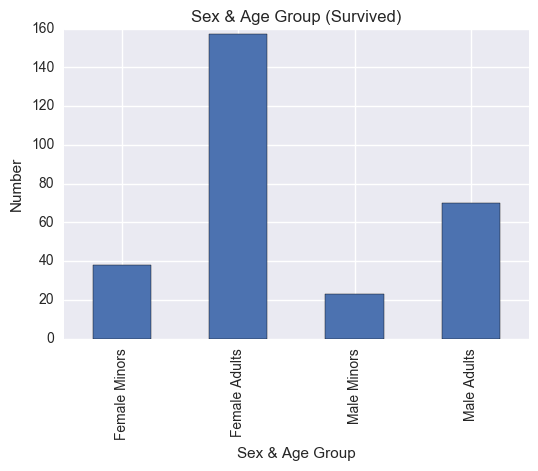

In [69]:
ax = total_survived.plot(x=1,kind='bar', title='Sex & Age Group (Survived)' )
labels = ['Female Minors', 'Female Adults', 'Male Minors', 'Male Adults']
ax.set(xlabel = "Sex & Age Group", ylabel="Number", xticklabels = labels)

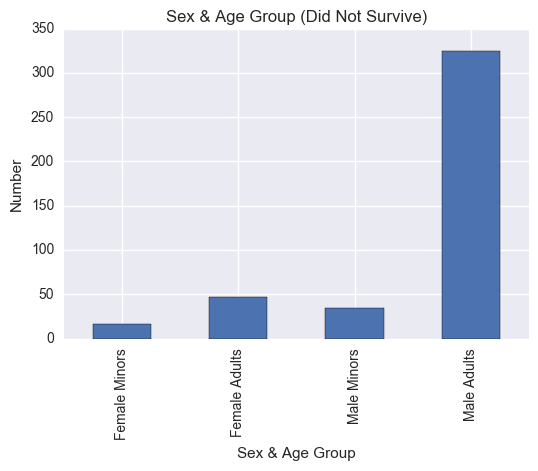

In [70]:
ax = total_did_not_survive.plot(x=1,kind='bar', title='Sex & Age Group (Did Not Survive)' )
labels = ['Female Minors', 'Female Adults', 'Male Minors', 'Male Adults']
ax.set(xlabel = "Sex & Age Group", ylabel="Number", xticklabels = labels)

Once again, we can see here that the group with the absolute highest number of people that survived was female adults while conversely, most of those that did not survive was male adults. It almost seem as if female adults and male adults are opposites in their survival rates. When it comes to minors, the absolute difference of those that survived versus those that did not are smaller (but still noticeable in higher in the group that survived). In thise case, looking at relative numbers may paint a more accurate picture of the survival rates between groups, especially since we have already found that you were more likely to survive if you were younger than 18 at the time. 

In [895]:
#Finding the proportion of those that survived in each age group
total_survived/(total_survived + total_did_not_survive)

Sex     Age Group
female  Minors       0.690909
        Adults       0.769608
male    Minors       0.396552
        Adults       0.177215
Name: Survived, dtype: float64

Compared to adult males, we can see that survival rates for males in the minor group are quite a bit higher. For females in the minor age group, it is only slightly less than female adults. For this reason, this data here is very suprising to me at first. Although we have conducted a z-test that concluded that minors had better survival rates than adults, it seems that it might be possible that this may no longer be true if we were to conduct a two prorpotion z-test, minors against female adults. The data here seems to suggest that females had almost or had the same priority as children, although further analysis will be required before we can make any conclusions. In addition, we can also see that male adults consist of an overwhelming majority of those that did not survive, and this may have biased the data when conducting the two proportion z-test between minors and adults.

Finally, I will now explore the different survival rates between a passenger's socioeconomic class in addition to the amount of fare a passenger paid for the trip

In [75]:
socioeconomic_survival_df = titanic_data_df[['Survived','Pclass', 'Fare', 'Embarked','Age']]

In [81]:
#Grouping passenger survival data by passenger Port of Embarkation
#C = Cherbourg, Q = Queenstown, S = Southampton
survival_data_by_embarkation = socioeconomic_survival_df.groupby('Embarked')

In [82]:
survival_data_by_embarkation.mean()

,Survived,Pclass,Fare,Age
Embarked,,,,
C,0.607692,1.746154,68.296767,30.814769
Q,0.285714,2.785714,18.265775,28.089286
S,0.362816,2.328520,27.476284,29.445397


In [90]:
#Grouping by Port of Embarkation and Pclass and counting the number of passegers that belonged to each group
socioeconomic_survival_df.groupby(['Embarked', 'Pclass'])['Survived'].count()

Embarked  Pclass
C         1          74
          2          15
          3          41
Q         1           2
          2           2
          3          24
S         1         108
          2         156
          3         290
Name: Survived, dtype: int64

In [79]:
#Grouping passenger survival data by Pclass
survival_data_by_pclass = socioeconomic_survival_df.groupby('Pclass')

In [80]:
survival_data_by_pclass.mean()

,Survived,Fare,Age
Pclass,,,
1,0.652174,88.048121,38.105543
2,0.479769,21.471556,29.877630
3,0.239437,13.229435,25.140620


In [928]:
#Grouping passengers into their socio-economic class and sex, and counting how many belonged to each class
socioeconomic_survival_df.groupby(['Sex', 'Pclass'])['Survived'].count()

Sex     Pclass
female  1          83
        2          74
        3         102
male    1         101
        2          99
        3         253
Name: Survived, dtype: int64

In [74]:
#Correlation between socio-economic class and fare.
#The value we get here is negative as a smaller Pclass means a higher class
socioeconomic_survival_df['Pclass'].corr(socioeconomic_survival_df['Fare'])

-0.55289322064576008

Not suprisingly, there is a relatively high correlation of 55% of socio-economic class and the fare paid. One possible limitation here is that the average fare take into account the passengers from all 'Ports of Embarkation'. It is likely that passengers paid very different fares coming from a different origin. As we can see above, those coming from Cherbough paid the highest fares and had the best survival rates, while those that paid the lowest came from Queenstown and had the worse survival rates. One reason that this may be the the case is that most of the passengers from Cherbough were first class passengers while for those coming from Queenstown, it was mostly third class passengers. (Being in Pclass 1 is correlated with the overall highest survival rates while Pclass 3 passengers had the lowest survival rates)

We can also see here seem that those that are in the highest socio-economic class along with those that paid the most in terms of fare had the best survival rates of 65%. Some reasons this may be the case is higher quality of safety equipment and gear, better layout of escape routes,bbeing prioritised, less crowded space allowing faster escape, being located closer to the exit, better disaster instructions and management, or even better education. In fact, titanic first class was known for its luxury at the time $^4$.  However none of these factors are certain but the data here does seem to suggest at least some of these facors  may have led to improved survival rates here.

Furthermore, it does not seem to be the case that the increased survival rates of Pclass 1 passengers can be explained by the passengers being a majority as female or are minors. In addition, we can  see the number of females in Pclass 1 is actually less than males, and that the average age of Pclass 1 passengers is actualy the highest amoung all Pclasses. In terms of Pclass 3, it may be possible that a factor that may have contributed to the low survival rates of this group is due to it being a majority consisting of men (who has the lowest survival rates), though this may not be the only reason and cannot be concluded until further analysis.

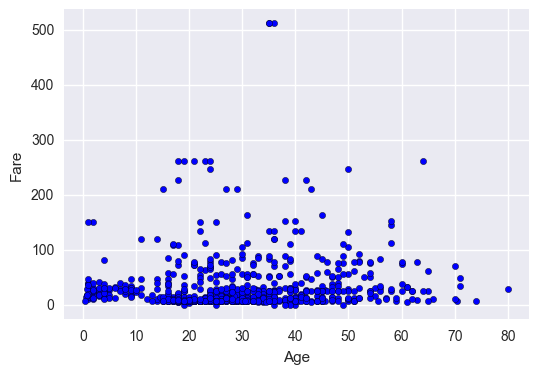

In [981]:
#Scatter plot with Age as the independent Variable and Fare as the dependent. 
#This is to see if there is any relationship between Age and Fare which may have played a part in survival rates.
plt.xlabel("Age")
plt.ylabel('Fare')
plt.margins(0)
plt.scatter(socioeconomic_survival_df['Age'],socioeconomic_survival_df['Fare'])

In [985]:
socioeconomic_survival_df['Age'].corr(socioeconomic_survival_df['Fare'])

0.093142517894115193

Suprisingly, there does not seem to be much of a correlation between Age and the Fare paid even though Pclass 1 passengers had the highest average age. We can also see here that the fare paid for the age group with the best survival rates (0 to 17) do not seem much different from the other groups. It is possible, that tickets for children at the time were lower in price than the adult equivalent. However, this scatterplot seems to suggest a only very weak relationship between fare paid and age. We saw earlier that there is a relatively high correlation between Fare and Pclass, and therefore it does not seem very likely that being older is more likely to put you in a higher Pclass at the time. This means that the higher survival rates of Pclass 1 passengers are unlikely to be due to Age of the passengers. 

Note that there are two outliers in the scatterplot. This means which our earlier data on the mean fare paid by passengers may have been biased higher by these two outlers.

In [96]:
#Putting Passengers into groups based on how much they paid for the Titanic trip
bins = [0, 50, 100, 300, 1000]
labels = ['0 to 50', ' 51 to 100', '101 to 300',  '301<']
socioeconomic_survival_df['Fare Range'] = pd.cut(socioeconomic_survival_df['Fare'], bins, labels = labels, right=False, include_lowest=True)

In [103]:
#Grouping survival data by Fare Range, which we have created above
survival_data_grouped_by_fare_range =  socioeconomic_survival_df.groupby('Fare Range', as_index=False).mean()

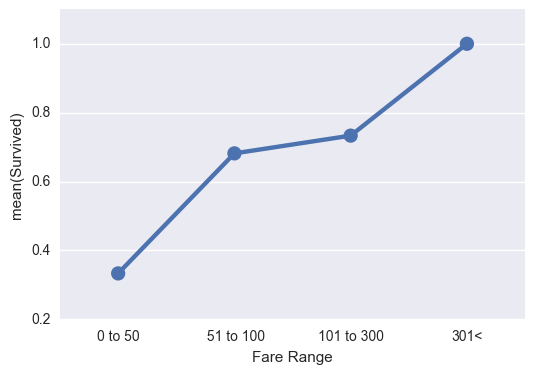

In [104]:
#A quick plot to show that passengers that paid more is correlated with higher survival rates. 
#An interesting thing to note is that the two outlier passengers that paid more than 300 both survived
sns.pointplot(x="Fare Range", y="Survived", data=survival_data_grouped_by_fare_range);

To conclude, it seems that if you were a passenger on the Titanic at the time, you had a greater chance of survival if you were under 18. Passengers who were female, paid higher fares and subsequently who are in a higher Pclass were correlated with higher survival rates as well. It was very likely that children and females were prioritied when evacuating the ship.

I also found that unless you were under 18, being younger does not seem to be correlated with higher survival rates and being older does not seem to be correlated with the fare paid either. This means the higher survival rates of higher Pclass passengers does not seem to be due to age of the passengers. Furthermore, even though it seemed female adults had a greater survival rate, the sex distribution of Pclass 1 passengers were more or less 50 50 with a little more passengers being male (Although they make up most of the Pclass 3 passengers as well. Although no conclusion can be made for why higher Pclass passengers are more likely to have survived at the time, it was more likely due to unexplored variables such as being in a less crowded room when escaping to lifeboats, better equipment, instructions, being prioritised etc. 

Interestingly, we also found that Passengers whose port of embarkation was Queenstown rather than Cherbourg survived less overall as a group, although a casual relationship cannot be drawn. Furthermore, this is more likely due to the fact that Cherbough passengers were mostly Pclass 1 in contrast with Queenstown passengers who are mostly Pclass 3 (Although this cannot be proven a cause and effect relationship without further analysis). 

In [ ]:
References:
1. http://www.titanicfacts.net/titanic-maiden-voyage.html
2. https://www.theguardian.com/uk/2012/apr/10/heroic-role-titanic-engineer
3. http://www.dailymail.co.uk/sciencetech/article-1254788/Why-women-children-saved-Titanic-Lusitania.html
4. http://www.nytimes.com/2012/04/08/sunday-review/the-not-so-luxurious-titanic.html?mcubz=3